In [1]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

Data with 79 variables describing different aspects of houses in USA, Iowa. 

SalePrice: the property's sale price in dollars. This is the target variable that we are trying to predict.

In [2]:
main_df = pd.read_csv('train.csv')

In [3]:
#main_df.info()
main_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Look through the variables

We start by going through all the different variables and think about their impact on the target variable and we think about the possible correlations between different variables. For instance, this data set includes both GarageCars and GarageArea variables which describe, size of garage in car capacity and size of garage in square feet. Common sense tells us that these two variables describe pretty much the very same thing and we would like to have as few variables as possible in order to not overfitt our model. In addition, some of the variables might be present for very few houses and this can be dangerous. We want our model to distinguish between different features instead of simply remembering a number of examples, then our model will hopefully be effective outside of this dataset too! 

In [5]:
main_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Categorical variables

This data includes both numerical and categorical variables, I will start by droping the categorical variables and test a model without them, and then perform some of the following methods to create a model that includes the categorical variables:

Label encoding assigns each unique value to a different integer.

One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data (I did not perfom this one yet but I think that it would improve the model)

In [6]:
#Get list of categorical variables
s = (main_df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### Missing values

Some of the varibales will include missing values, in these cases we can: drop this variable or fill the missing values with some number (the mean of the column or a constant). I will start by droping the values completely, and perform imputation for the second model.

In [7]:
#This is information we already got in the main_df.info()
cols_with_missing_val = [col for col in main_df.columns
                     if main_df[col].isnull().any()]
cols_with_missing_val

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [9]:
numb_of_missing_val = main_df[cols_with_missing_val].isna().sum()
numb_of_missing_val

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Many of these variables seemed unnecessary already in the first step when I was looking through the variables. Droping a whole column of variables when only 1 or 8 values are missing seems to be risky but consider "Electrical" which describes the electrical system, or "MasVnrArea" which stands for Masonry veneer type (https://en.wikipedia.org/wiki/Masonry_veneer, I had to google this one since I had no idea of what it is.). Both the electrical system and masonry veneer type, are not the first things I would think about when I look for a new house. On the other hand note that there are some variables, such as "BsmtCond" (general condition of the basement) which might affect the target variable, but let us come back to this variable later (and perform imputation) and drop all the columns with missing values for now. 


Droping columns of variables that most of their values are missing seems to be a good idea, since filling these missing values would be hard with so few data points to deduce information from. 

I perform the dropping after the diagnostics of multicollinearity.

### Multicollinearity Diagnostics

My favorite course that I took during the last year of my bachelor in engineering physics was regression analysis, the most simple method for diagnostics of multicollinearity between variables was the inspection of the off-diagonal elements in the correlation matrix. If the variables are nearly linearly dependent then their off-diagonal element will be near near the number one (absolute value)!

Note that one has to be carefull and not deduce more information from the matrix that is given. We only get to know which pairs of variables are correlated, when there is more than two variables involved in such dependence, there is no assurance that their corresponding off-diagonal element will be near 1. 

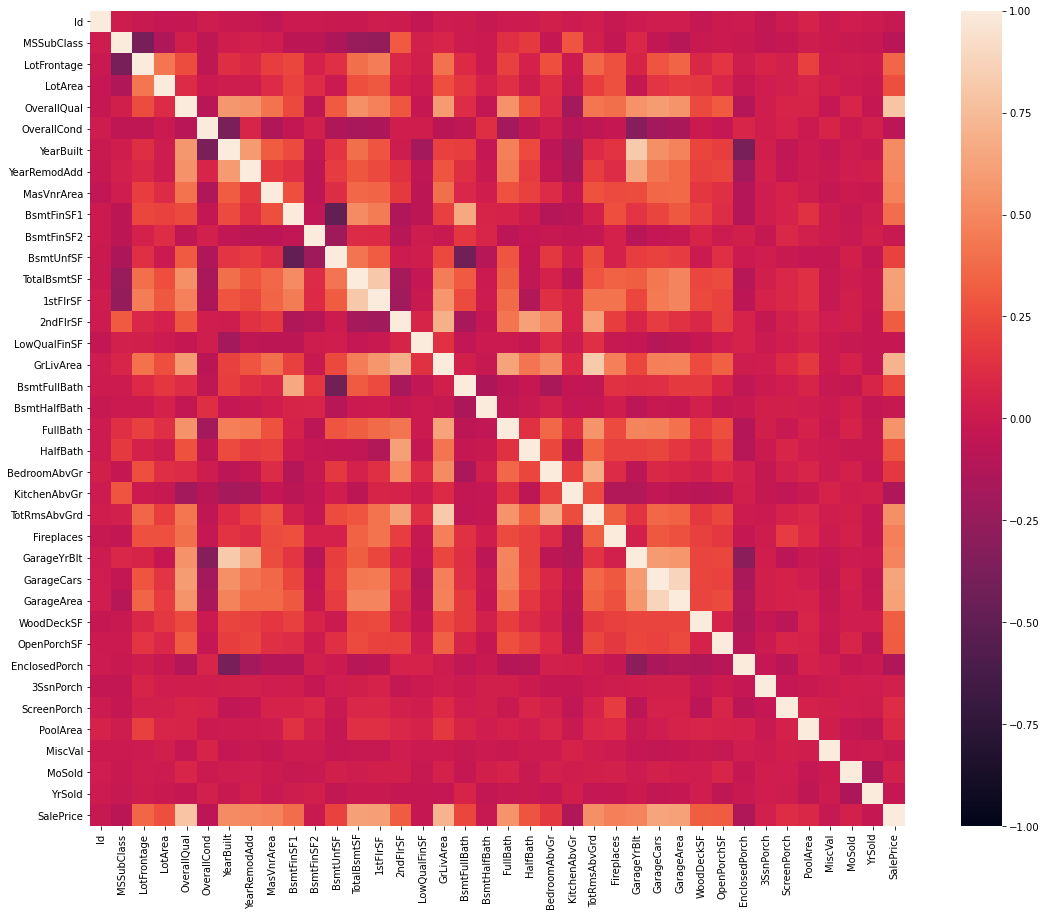

In [10]:
corr_mat = main_df.corr()
f, ax = plt.subplots(figsize=(20, 15))
sea.heatmap(corr_mat,vmin=-1, vmax=1, square=True);

Note that this matrix only contains the variables that had a numerical value!

But we see that for instance GarageYrBlt and YearBuilt, GarageCars and GarageArea, TotRmsAbvGrd and GrLivArea, 1stFlrSF and TotalBsmtSF are highly correlated variables. This results verify our intuition about removing a variable such as GaragaeArea and using GarageCars only. 

Furthermore we see which variables are correlated with the SalePrice, thus they should have an impact on the sales price? I will perform one more feature selection to be more certain which variables to choose.

#### Droping columns

In [11]:
cols_to_drop1 = main_df[object_cols]
cols_to_drop2 = main_df[cols_with_missing_val]
cols_to_drop = pd.concat([cols_to_drop1, cols_to_drop2], axis=1)
reduced_df=main_df.drop(cols_to_drop,axis=1)

### Feature Selection

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [13]:
def select_features(train_X, train_y, val_X):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression,k='all') 
    # learn relationship from training data
    fs.fit(train_X, train_y)
    # transform train input data
    X_train_fs = fs.transform(train_X)
    # transform test input data
    X_test_fs = fs.transform(val_X)
    return X_train_fs, X_test_fs, fs

In [45]:
# split into train and test sets
y=reduced_df['SalePrice']
X=reduced_df.drop(['SalePrice'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Feature 0: 1.089740
Feature 1: 10.145981
Feature 2: 79.623937
Feature 3: 1460.653154
Feature 4: 7.990384
Feature 5: 315.166758
Feature 6: 309.200082
Feature 7: 143.323110
Feature 8: 0.043207
Feature 9: 48.974863
Feature 10: 496.215251
Feature 11: 509.997317
Feature 12: 105.193364
Feature 13: 0.000013
Feature 14: 882.196380
Feature 15: 39.146716
Feature 16: 0.085493
Feature 17: 490.797772
Feature 18: 78.652535
Feature 19: 36.769926
Feature 20: 19.659265
Feature 21: 399.928901
Feature 22: 248.009575
Feature 23: 653.752591
Feature 24: 575.950601
Feature 25: 112.932724
Feature 26: 111.159074
Feature 27: 16.039369
Feature 28: 0.353340
Feature 29: 16.424660
Feature 30: 0.810417
Feature 31: 0.510118
Feature 32: 1.435800
Feature 33: 0.230994


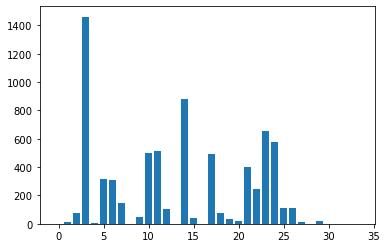

In [17]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [18]:
reduced_df.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### First Model

In this model I select the features that performed with a score above 100 and choose the better score of the ones that were correlated. This is a basic model that droped all of the categorical and some of the numerical data. 

Feature 3, OverallQual, Feature 5, YearBuilt, Feature 6, YearRemodAdd, Feature 7, BsmtFinSF1, Feature 10, TotalBsmtSF, Feature 11, 1stFlrSF, Feature 12, 2ndFlrSF, Feature 14, GrLivArea, Feature 17, Fullbath, Feature 21, TotRmsAbvGrd, Feature 22, Fireplaces, Feature 23, GarageCars, Feature 24, GarageArea, Feature 25, WoodDeckSF, Feature 26, OpenPorchSF

These features scored above 100 (Why 100? Should test others too!), but note that GarageCars and GarageArea were correlated thus we choose GarageCars since it has a higher score, 653.75>575.95. TotRmsAbcGrd and GrLivArea were correlated too and we proceed with GrLivArea. 1stFLrSF and TotalBsmtSF were correlated and we proceed with 1stFlrSF. 

In [19]:
features=['OverallQual','YearBuilt','YearRemodAdd','BsmtFinSF1','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','Fireplaces','GarageCars','WoodDeckSF','OpenPorchSF']


In [20]:
X_first=reduced_df[features]
y=reduced_df['SalePrice']

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [22]:
train_X, val_X, train_y, val_y = train_test_split(X_first, y, test_size=0.33, random_state = 0)

In [41]:
# function for comparing different models
def score(train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(train_X, train_y)
    preds = model.predict(val_X)
    return mean_absolute_error(val_y, preds)

print("Score of the first model:")
score(train_X,val_X,train_y,val_y)

Score of the first model:


18382.59773967595

### Second Model

In this model I will include categorical variables by performing label encoding (good for tree based models) and do imputation on the missing values, hopefully it will improve the model!

'ExterCond','ExterQual','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond'

These 8 variables, have very similar rating as for instance, "Excellent, Good, Average/Typical, Fair, Poor" We can think about them as rating 5-1. 

In [25]:
categorical_df=main_df[['ExterCond','ExterQual','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond']]



Let's handle the missing values first. Which are present for the following variables: BsmtQual, BsmtCond, GarageQual, GarageCond. Where the NaN value means "no basement" or "no garage", thus we can set the NaN values to a string 'NO' which will be rated as the lowest possible rate.


In [26]:
categorical_df.fillna('NO', inplace=True)

/Users/wojtasratusznik/.local/lib/python3.8/site-packages/pandas/core/frame.py:4031: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame,


In [27]:
from sklearn.preprocessing import LabelEncoder
X2=categorical_df
y2=main_df['SalePrice']
test=X2.copy()

label_encoder = LabelEncoder()

for col in categorical_df.columns:
    test[col]=label_encoder.fit_transform(X2[col])

In [31]:
df_second=pd.concat([reduced_df, test], axis=1)

### Fil the missing numerical values with a value

LotFrontage MasVnrArea GarageYrBlt

In [29]:
df_to_impute=main_df[['LotFrontage','MasVnrArea','GarageYrBlt']]
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant')
df_imputed=imp_mean.fit_transform(df_to_impute)

dataset = pd.DataFrame({'LotFrontage': df_imputed[:, 0], 'MasVnrArea': df_imputed[:, 1], 'GarageYrBlt': df_imputed[:,2]})

In [32]:
df_second=pd.concat([df_second, dataset], axis=1)

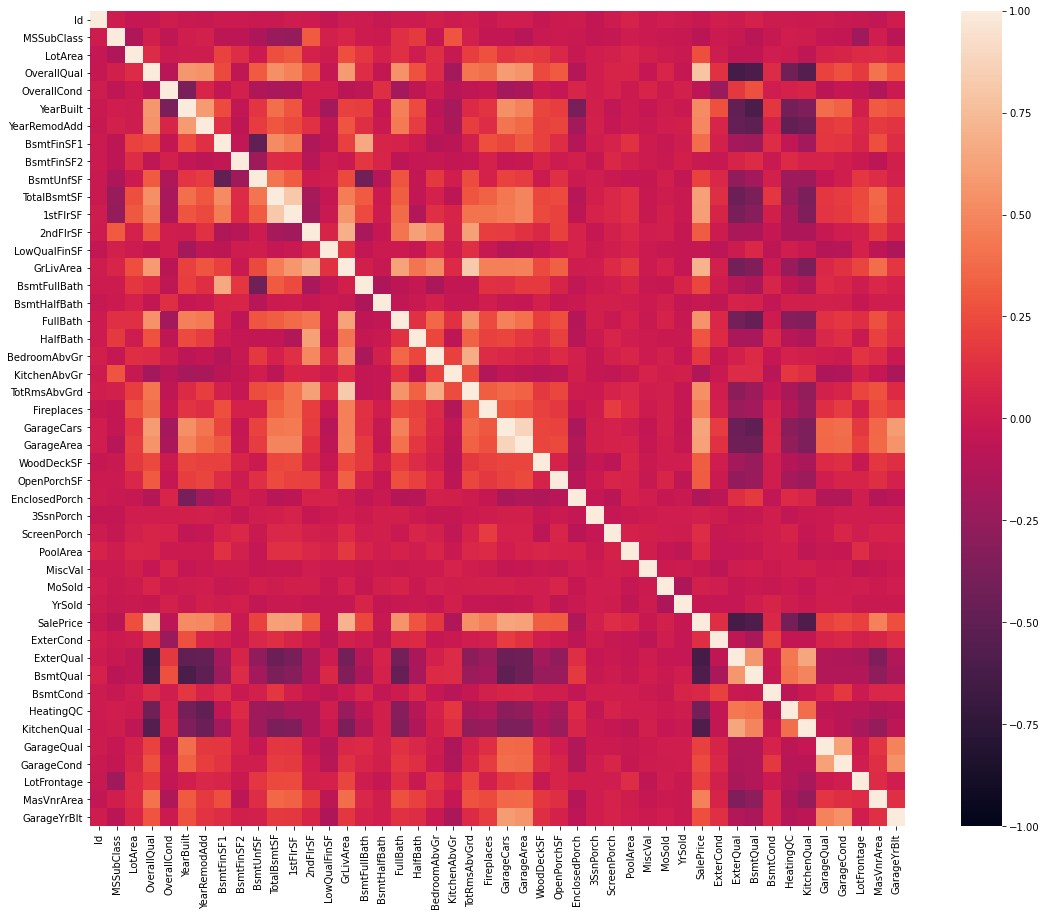

In [33]:
corr_mat = df_second.corr()
f, ax = plt.subplots(figsize=(20, 15))
sea.heatmap(corr_mat,vmin=-1, vmax=1, square=True);

In [34]:
#split into train and test sets
y2 = df_second['SalePrice']
X2 = df_second.drop(['SalePrice'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=1)

Feature 0: 1.089740
Feature 1: 10.145981
Feature 2: 79.623937
Feature 3: 1460.653154
Feature 4: 7.990384
Feature 5: 315.166758
Feature 6: 309.200082
Feature 7: 143.323110
Feature 8: 0.043207
Feature 9: 48.974863
Feature 10: 496.215251
Feature 11: 509.997317
Feature 12: 105.193364
Feature 13: 0.000013
Feature 14: 882.196380
Feature 15: 39.146716
Feature 16: 0.085493
Feature 17: 490.797772
Feature 18: 78.652535
Feature 19: 36.769926
Feature 20: 19.659265
Feature 21: 399.928901
Feature 22: 248.009575
Feature 23: 653.752591
Feature 24: 575.950601
Feature 25: 112.932724
Feature 26: 111.159074
Feature 27: 16.039369
Feature 28: 0.353340
Feature 29: 16.424660
Feature 30: 0.810417
Feature 31: 0.510118
Feature 32: 1.435800
Feature 33: 0.230994
Feature 34: 13.495911
Feature 35: 669.656906
Feature 36: 456.096993
Feature 37: 7.674252
Feature 38: 162.638106
Feature 39: 477.796988
Feature 40: 30.375899
Feature 41: 55.682318
Feature 42: 45.654378
Feature 43: 272.889707
Feature 44: 62.761621


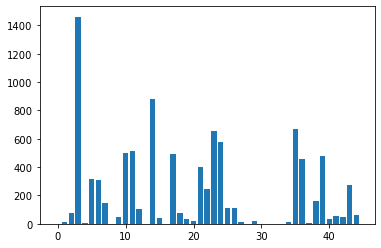

In [36]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Feature 3, OverallQual, Feature 5, YearBuilt, Feature 6, YearRemodAdd, Feature 7, BsmtFinSF1, Feature 10, TotalBsmtSF, Feature 11, 1stFlrSF, Feature 12, 2ndFlrSF, Feature 14, GrLivArea, Feature 17, Fullbath, Feature 21, TotRmsAbvGrd, Feature 22, Fireplaces, Feature 23, GarageCars, Feature 24, GarageArea, Feature 25, WoodDeckSF, Feature 26, OpenPorchSF, Feature 35, ExterCond, Feature 36, ExterQual, Feature 38, BsmtCond and feature 39 HeatingQC, feature 42, GarageCond, feature 43, LotFrontage, feature 44, MasVnrArea, all have scores above 100.

In [37]:
df_second.columns[43]

'LotFrontage'

In [38]:
features2=['OverallQual','YearBuilt','YearRemodAdd','BsmtFinSF1','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','Fireplaces','GarageCars','WoodDeckSF','OpenPorchSF','ExterCond','BsmtCond','HeatingQC','LotFrontage']


In [46]:
X_second=df_second[features2]
y=main_df['SalePrice']

In [47]:
train_X2, val_X2, train_y2, val_y2 = train_test_split(X_second, y, test_size=0.33, random_state = 0)
print("Score of the second model:")
score(train_X2,val_X2,train_y2,val_y2)

Score of the second model:


18266.486309029835